# PDP (Partial Denpendence Plot)

### PDP - one way, two way

PDP(Partial Dependence Plot)는 머신러닝 모델의 예측에 특정 피처가 어떻게 영향을 미치는지 시각적으로 나타내는 방법입니다. PDP는 해석 가능한 머신러닝 모델을 만드는데 유용하며, 특히 모델이 복잡할 때 특정 피처가 예측에 미치는 영향을 이해하는 데 큰 도움이 됩니다. PDP에는 One-Way PDP와 Two-Way PDP가 있습니다.

### 1. One-Way PDP
    
One-Way PDP는 하나의 피처가 모델 예측에 미치는 영향을 보여줍니다. 특정 피처 값을 일정한 범위로 변화시키며 해당 값이 예측에 어떻게 영향을 미치는지 시각화합니다.

- One-Way PDP의 특징:
    - 하나의 피처에 대한 예측 변화를 보여주므로, 각 피처가 독립적으로 예측에 미치는 영향을 쉽게 확인할 수 있습니다.
    - 비선형 관계를 파악하거나, 피처 값에 따라 예측이 급격히 변하는 구간을 이해할 수 있습니다.

    
### 2. Two-Way PDP
    
Two-Way PDP는 두 개의 피처가 동시에 모델 예측에 미치는 상호작용을 보여줍니다. 두 피처의 조합이 예측에 어떻게 영향을 미치는지 시각화하기 때문에, 피처 간의 상호작용을 파악하는 데 유용합니다.

- Two-Way PDP의 특징:
    - 두 피처 간의 상호작용을 확인할 수 있습니다.
    - 특정 피처 조합이 모델 예측에 미치는 복잡한 영향을 분석할 수 있습니다.

!pip install xgboost pdpbox scikit-learn

In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Step 1: 데이터 생성
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(10)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [51]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
29,-1.021233,-0.555200,0.243801,0.708356,-1.448014,1.881157,-0.564079,-2.198806,-0.502054,0.440014
535,1.007304,-1.755506,-0.864427,0.023385,-0.885714,0.453905,1.589523,-0.624835,0.732151,-1.101286
695,0.190917,-0.475795,0.146935,-0.036331,-0.687014,-0.826112,-0.522132,-1.350556,-1.684668,-0.075871
557,0.703492,-0.193610,-0.275951,-0.077821,0.641947,0.744586,-0.361724,-0.270268,-0.824650,0.217718
836,-0.921860,-1.846188,0.207267,-1.003957,-1.496529,-0.929511,0.069344,-0.650024,-1.449645,-0.083438
...,...,...,...,...,...,...,...,...,...,...
106,-0.053905,-1.181874,1.121858,-0.982304,2.086047,0.449474,2.320041,-1.014759,0.416446,-0.361463
270,0.030476,0.240877,-0.652950,-0.897253,0.369016,-0.665693,-0.549789,0.124286,0.776937,0.936056
860,2.571995,-1.242247,0.608736,-2.249432,-1.096220,-1.125587,-0.557131,-0.067871,0.739675,0.431632
435,0.034083,-0.379128,0.233786,-0.769973,-0.581681,-0.203580,-1.555896,-1.014757,-1.223940,-0.649278


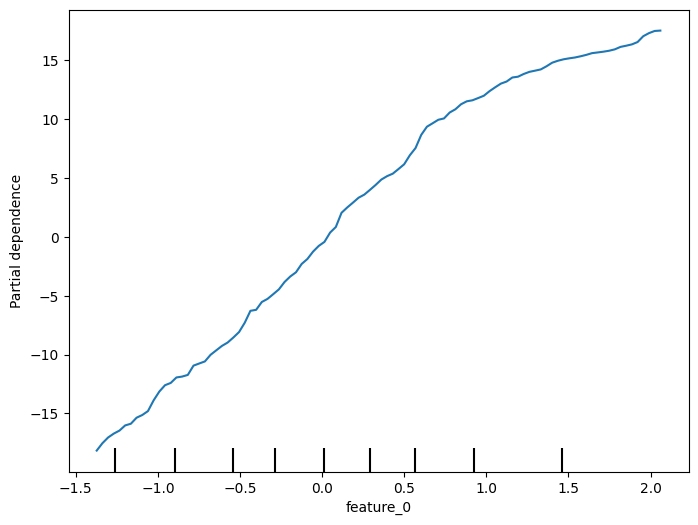

In [4]:
# Step 3: One-Way PDP 생성
# 'feature_0'에 대한 One-Way PDP
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_test, features=['feature_0'], ax=ax)
plt.show()

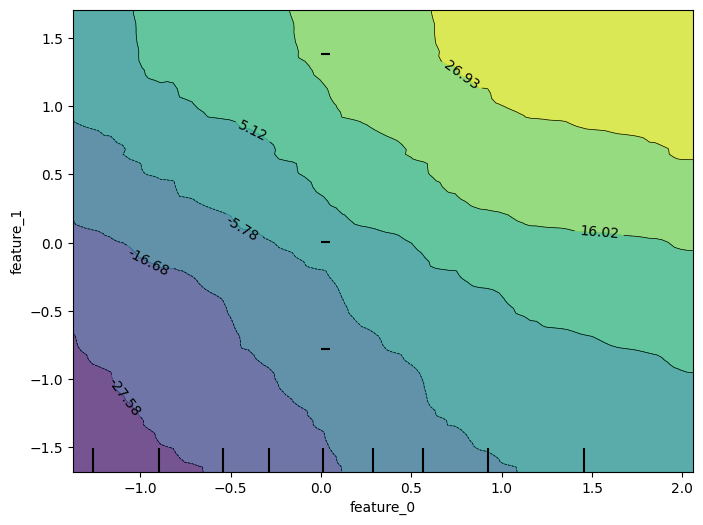

In [52]:
# Step 4: Two-Way PDP 생성
# 'feature_0'과 'feature_1'에 대한 Two-Way PDP
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model, X_test, features=[('feature_0', 'feature_1')], ax=ax, kind="average"
)
plt.show()

In [53]:
rul_df = pd.read_csv('exam2.modify3.csv')
rul_df.columns

Index(['engine', 'cycle', 'T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32', 'RUL_log'],
      dtype='object')

In [54]:
features = ['T24', 'T30', 'T50', 'P30', 'Nf', 'Nc', 'Ps30',
       'phi', 'NRf', 'NRc', 'BPR', 'htBleed', 'W31', 'W32']

label = 'RUL_log'

train, test = rul_df[0::2], rul_df[1::2]  # Train(5) : test(5) 
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

In [55]:
# Step 2: 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

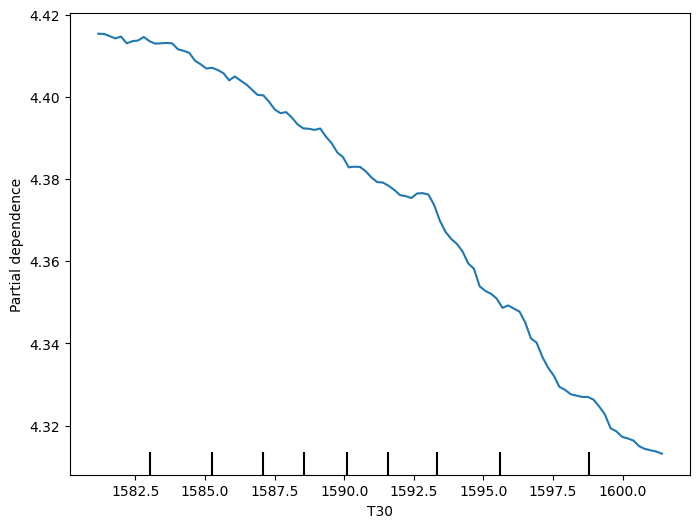

In [57]:
# Step 3: One-Way PDP 생성
# 'T30'에 대한 One-Way PDP
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_test, features=['T30'], ax=ax)
plt.show()

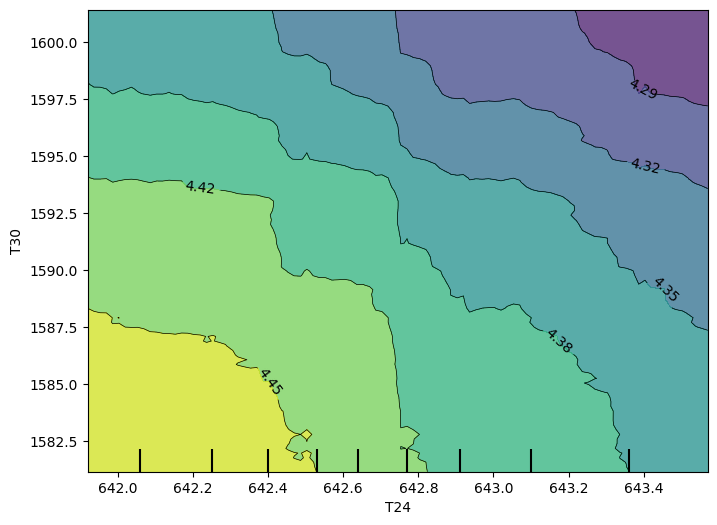

In [58]:
# Step 4: Two-Way PDP 생성
# 'T24'과 'T30'에 대한 Two-Way PDP
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(
    model, X_test, features=[('T24', 'T30')], ax=ax, kind="average"
)
plt.show()

# 추천 시스템
- CB(Content-Based), KB(Knowledge-Based)
- CF(Collaborative Filtering,  협업 필터링) - User Based, Item Based
- HF(Hybrid Filtering, 하이브리드 필터링)
----
- cross_sell, up-sell, down-sell

추천 시스템(Recommendation System)은 사용자의 취향, 과거 행동, 다른 사용자와의 유사성 등을 분석하여 개인 맞춤형 추천을 제공하는 시스템입니다. 이를 통해 사용자에게 상품, 콘텐츠, 서비스 등을 추천하여 사용자 경험을 향상하고, 기업에게는 판매와 참여도를 높이는 데 도움을 줍니다. 추천 시스템은 크게 세 가지로 나눌 수 있습니다

1. 콘텐츠 기반 필터링(Content-Based Filterin)

2. 협업 필터링(Collaborative Filtering)

- 사용자 기반(User-Based)
- 아이템 기반(Item-Based).

3. 하이브리드 필터링(Hybrid Filtering)

콘텐츠 기반 필터링과 협업 필터링을 결합하여 더 정확한 추천을 제공합니다. 예를 들어, 협업 필터링의 단점을 콘텐츠 기반 필터링으로 보완하거나 그 반대로 활용할 수 있습니다.

### 1. 콘텐츠 기반 필터링 (Content-Based Filtering)

사용자가 과거에 좋아했던 아이템의 특성을 분석하여 유사한 특성을 가진 아이템을 추천합니다. 각 아이템은 여러 특성(예: 영화의 장르, 감독, 배우, 제작 연도 등)으로 표현되며, 사용자와 아이템 간의 유사성을 계산해 추천을 제공합니다.

- 예제: 영화 추천 시스템

사용자가 좋아했던 영화의 장르 정보를 기반으로 새로운 영화를 추천하는 시스템을 구현해보겠습니다.

In [13]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# 가상의 영화 데이터
movies = pd.DataFrame({
    'Title': ['Movie1', 'Movie2', 'Movie3', 'Movie4', 'Movie5'],
    'Genre': ['Action Adventure', 'Action Sci-Fi', 'Romance', 'Adventure', 'Sci-Fi']
})

# 사용자가 시청하고 좋아한 영화
user_liked_movies = ['Movie1']

# 장르 기반 TF-IDF 행렬 생성
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(movies['Genre'])

# 코사인 유사도를 사용하여 영화 간 유사도 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 사용자가 좋아한 영화와 다른 영화 간 유사도를 계산하여 추천
def content_based_recommend(user_liked_movies, movies, cosine_sim):
    liked_movie_idx = movies[movies['Title'].isin(user_liked_movies)].index[0]
    sim_scores = list(enumerate(cosine_sim[liked_movie_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    recommended_indices = [i[0] for i in sim_scores[1:]]
    return movies.iloc[recommended_indices]

# 사용자에게 추천할 영화 목록
recommended_movies = content_based_recommend(user_liked_movies, movies, cosine_sim)
print(recommended_movies)

    Title          Genre
3  Movie4      Adventure
1  Movie2  Action Sci-Fi
2  Movie3        Romance
4  Movie5         Sci-Fi


위 코드에서는 사용자가 좋아했던 영화와 비슷한 장르의 영화를 추천합니다. TF-IDF를 사용하여 각 영화의 장르를 벡터화하고, 코사인 유사도를 이용해 유사한 영화를 찾아냅니다.

### 2. 협업 필터링(Collaborative Filtering)
   
유사한 취향을 가진 사용자 집단을 찾아 그들이 좋아한 아이템을 추천합니다. 협업 필터링은 다시 두 가지로 나뉩니다:

- 사용자 기반 협업 필터링(User-Based Collaborative Filtering): 비슷한 취향을 가진 사용자들이 좋아하는 아이템을 추천합니다.
- 아이템 기반 협업 필터링(Item-Based Collaborative Filtering): 사용자가 좋아했던 아이템과 유사한 아이템을 추천합니다.

- 예제: 사용자 기반 협업 필터링을 통한 영화 추천 시스템

사용자가 평점을 매긴 영화를 기반으로 유사한 취향을 가진 다른 사용자의 평가를 통해 영화를 추천합니다.

In [14]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# 가상의 사용자-아이템 평점 데이터 (User-Item Matrix)
ratings = pd.DataFrame({
    'User': ['User1', 'User2', 'User3', 'User4'],
    'Movie1': [5, 4, 0, 0],
    'Movie2': [4, 0, 0, 2],
    'Movie3': [1, 2, 3, 5],
    'Movie4': [0, 3, 4, 2],
    'Movie5': [0, 0, 5, 4]
})
ratings.set_index('User', inplace=True)

# 사용자 간 유사도 계산
user_similarity = cosine_similarity(ratings)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings.index, columns=ratings.index)

# 특정 사용자에게 추천할 영화를 찾는 함수
def user_based_recommend(user, user_similarity_df, ratings_df):
    similar_users = user_similarity_df[user].sort_values(ascending=False)
    user_ratings = ratings_df.loc[user]
    unseen_movies = user_ratings[user_ratings == 0].index
    
    # 유사한 사용자의 평가를 이용하여 추천 점수 계산
    recommendations = {}
    for movie in unseen_movies:
        weighted_sum = sum(similar_users[other_user] * ratings_df.loc[other_user, movie] 
                           for other_user in similar_users.index if ratings_df.loc[other_user, movie] > 0)
        similarity_sum = sum(similar_users[other_user] for other_user in similar_users.index if ratings_df.loc[other_user, movie] > 0)
        recommendations[movie] = weighted_sum / similarity_sum if similarity_sum != 0 else 0
        
    recommendations = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)
    return recommendations

# 예: User1에게 추천
recommendations_for_user1 = user_based_recommend('User1', user_similarity_df, ratings)
print(recommendations_for_user1)

[('Movie5', np.float64(4.185965977355385)), ('Movie4', np.float64(2.774941837076779))]


이 예제에서는 User1과 유사한 사용자의 평가를 바탕으로 User1이 시청하지 않은 영화 중에서 추천할 영화를 찾습니다.

### 3. 하이브리드 필터링(Hybrid Filtering)

콘텐츠 기반 필터링과 협업 필터링을 결합하여 더 정확한 추천을 제공합니다. 예를 들어, 협업 필터링의 단점을 콘텐츠 기반 필터링으로 보완하거나 그 반대로 활용할 수 있습니다.

- 예제: 하이브리드 영화 추천 시스템

사용자의 영화 평점과 영화의 장르 정보를 모두 활용하여 영화를 추천합니다.

In [16]:
import numpy as np

# 콘텐츠 기반 유사도와 협업 필터링 유사도를 결합하여 추천 점수 계산
def hybrid_recommend(user, user_similarity_df, movies, cosine_sim, ratings_df, alpha=0.5):
    # 사용자 기반 협업 필터링 추천 점수
    collaborative_recommendations = user_based_recommend(user, user_similarity_df, ratings_df)
    collaborative_scores = {movie: score for movie, score in collaborative_recommendations}
    
    # 콘텐츠 기반 필터링 추천 점수
    user_liked_movies = ratings_df.loc[user][ratings_df.loc[user] > 0].index.tolist()
    content_recommendations = content_based_recommend(user_liked_movies, movies, cosine_sim)
    content_scores = {movie: len(content_recommendations) - i for i, movie in enumerate(content_recommendations['Title'])}
    
    # 하이브리드 점수 계산 (alpha는 두 점수의 가중치 조정)
    hybrid_scores = {}
    all_movies = set(collaborative_scores.keys()).union(content_scores.keys())
    for movie in all_movies:
        collaborative_score = collaborative_scores.get(movie, 0)
        content_score = content_scores.get(movie, 0)
        hybrid_scores[movie] = alpha * collaborative_score + (1 - alpha) * content_score
        
    hybrid_scores = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    return hybrid_scores

# 예: User1에게 하이브리드 추천
hybrid_recommendations_for_user1 = hybrid_recommend('User1', user_similarity_df, movies, cosine_sim, ratings)
print(hybrid_recommendations_for_user1)

[('Movie4', np.float64(3.3874709185383898)), ('Movie5', np.float64(2.5929829886776923)), ('Movie2', 1.5), ('Movie3', 1.0)]


이 예제에서는 사용자 기반 협업 필터링과 콘텐츠 기반 필터링의 결과를 결합하여 추천 점수를 계산합니다. alpha 값으로 두 방법의 비중을 조절할 수 있습니다.


이렇게 각각의 필터링 방식과 예제를 통해 다양한 추천 시스템의 동작 원리와 구현 방법을 살펴볼 수 있습니다. 실제 환경에서는 더 많은 데이터를 이용하여 더 복잡한 모델과 알고리즘을 적용해 더 정밀한 추천을 제공할 수 있습니다

### Cross-sell (교차 판매)
교차 판매는 고객이 구매한 상품과 관련된 다른 상품을 제안하는 것입니다. 이를 통해 고객이 더 많은 상품을 구매하도록 유도하고, 구매 경험을 확장합니다. 예를 들어, 고객이 노트북을 구매할 때 노트북 가방이나 마우스를 함께 추천하는 것이 교차 판매에 해당합니다.

In [59]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors

# 가상의 구매 데이터 (상품 간 연관성)
data = {
    'Product': ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'Laptop Bag', 'Headset'],
    'Related Products': [
        ['Mouse', 'Keyboard', 'Laptop Bag', 'Headset'],
        ['Laptop', 'Keyboard'],
        ['Laptop', 'Mouse'],
        ['Laptop', 'Headset'],
        ['Laptop', 'Headset'],
        ['Laptop', 'Monitor']
    ]
}

df = pd.DataFrame(data)

# 교차 판매 추천 함수
def cross_sell_recommend(product_name, df):
    related_products = df[df['Product'] == product_name]['Related Products'].values
    if len(related_products) > 0:
        return related_products[0]
    else:
        return []

# 예: 노트북 구매 시 교차 판매 제안
recommended_products = cross_sell_recommend('Laptop', df)
print("Cross-sell recommendations for 'Laptop':", recommended_products)

Cross-sell recommendations for 'Laptop': ['Mouse', 'Keyboard', 'Laptop Bag', 'Headset']


### 설명:

cross_sell_recommend 함수는 특정 상품에 대해 관련된 상품 목록을 추천합니다.
노트북 구매 시 마우스, 키보드, 노트북 가방, 헤드셋 등을 함께 추천하는 방식입니다.

### 2. Up-sell (업셀링)
업셀링은 고객이 이미 관심을 가진 상품보다 고급 상품이나 상위 버전을 추천하여 구매 금액을 높이는 전략입니다. 예를 들어, 고객이 기본형 스마트폰을 구매하려고 할 때, 더 많은 기능을 제공하는 프리미엄 모델을 제안하는 것이 업셀링에 해당합니다.

In [18]:
import pandas as pd

# 가상의 상품 데이터 (상품 등급별 정보)
product_data = {
    'Product': ['Basic Laptop', 'Pro Laptop', 'Gaming Laptop'],
    'Category': ['Laptop', 'Laptop', 'Laptop'],
    'Price': [500, 1000, 1500]
}

df_products = pd.DataFrame(product_data)

# 업셀링 추천 함수
def up_sell_recommend(product_name, df):
    product_info = df[df['Product'] == product_name]
    if not product_info.empty:
        product_category = product_info['Category'].values[0]
        higher_price_products = df[(df['Category'] == product_category) & (df['Price'] > product_info['Price'].values[0])]
        return higher_price_products.sort_values(by='Price').head(1)['Product'].values
    return []

# 예: Basic Laptop 구매 시 업셀링 제안
up_sell_recommendation = up_sell_recommend('Basic Laptop', df_products)
print("Up-sell recommendation for 'Basic Laptop':", up_sell_recommendation)

Up-sell recommendation for 'Basic Laptop': ['Pro Laptop']


### 설명:

up_sell_recommend 함수는 현재 상품의 상위 버전을 추천합니다.
Basic Laptop을 구매하려는 고객에게는 Pro Laptop이 업셀링 상품으로 제안됩니다.

### 3. Down-sell (다운셀링)
다운셀링은 고객이 특정 상품을 구매하려다가 가격이나 다른 이유로 구매를 망설일 때, 더 저렴하거나 간소화된 상품을 제안하여 구매 전환을 유도하는 전략입니다. 예를 들어, 고객이 고가의 노트북을 구매하려다 망설인다면, 저렴한 대체 모델을 추천하는 것이 다운셀링입니다.

In [19]:
# 다운셀링 추천 함수
def down_sell_recommend(product_name, df):
    product_info = df[df['Product'] == product_name]
    if not product_info.empty:
        product_category = product_info['Category'].values[0]
        lower_price_products = df[(df['Category'] == product_category) & (df['Price'] < product_info['Price'].values[0])]
        return lower_price_products.sort_values(by='Price', ascending=False).head(1)['Product'].values
    return []

# 예: Gaming Laptop 구매 시 다운셀링 제안
down_sell_recommendation = down_sell_recommend('Gaming Laptop', df_products)
print("Down-sell recommendation for 'Gaming Laptop':", down_sell_recommendation)

Down-sell recommendation for 'Gaming Laptop': ['Pro Laptop']


### 설명:

down_sell_recommend 함수는 현재 상품보다 저렴한 대체 상품을 추천합니다.
Gaming Laptop을 구매하려다 망설이는 고객에게는 Pro Laptop이 다운셀링 상품으로 제안됩니다.

#### 요약
- Cross-sell: 고객이 구매한 상품과 관련 있는 다른 상품을 추천하여 추가 판매를 유도합니다.
- Up-sell: 더 고급스럽거나 상위 버전의 상품을 추천하여 구매 금액을 높입니다.
- Down-sell: 저렴한 대체 상품을 제안하여 구매를 유도합니다.

이 세 가지 전략을 통해 고객의 다양한 구매 상황에 맞춰 적절한 제안을 할 수 있으며, 이를 통해 매출을 증대시키고 고객 만족도를 높일 수 있습니다.

### 영화 추천 시스템 실습

In [62]:
import pandas as pd

movies = pd.read_csv('./ml-latest-small/movies.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')

print(movies.shape)
print(ratings.shape)

(9742, 3)
(100836, 4)


In [63]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [64]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [65]:
combined = pd.merge(ratings, movies)
combined

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [66]:
pvt = combined.pivot_table(index='userId', 
                           columns='title',
                           values='rating').fillna(0)
pvt

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.5,3.5,0.0,0.0,0.0


# Item-Based 추천

In [67]:
item_corr = pvt.corr()  # 20분 ~ 30분 소요 예제
item_corr

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,-0.001642,-0.002324,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,0.135943,-0.004325,...,-0.001642,0.339935,0.542247,0.706526,-0.001642,-0.007675,0.134327,0.325287,-0.008185,-0.001642
'Hellboy': The Seeds of Creation (2004),-0.001642,1.000000,0.706526,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,...,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Round Midnight (1986),-0.002324,0.706526,1.000000,-0.002324,-0.003191,-0.002324,0.170199,-0.002324,-0.014958,-0.006121,...,-0.002324,-0.006495,-0.003975,-0.003289,-0.002324,-0.010863,-0.010961,-0.005087,-0.011585,-0.002324
'Salem's Lot (2004),-0.001642,-0.001642,-0.002324,1.000000,0.857269,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,...,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Til There Was You (1997),-0.002254,-0.002254,-0.003191,0.857269,1.000000,-0.002254,-0.008797,-0.002254,-0.014510,-0.005938,...,-0.002254,-0.006301,-0.003856,-0.003191,-0.002254,-0.010538,-0.010632,-0.004935,-0.011238,-0.002254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),-0.007675,-0.007675,-0.010863,-0.007675,-0.010538,-0.007675,0.187953,0.212646,0.053614,0.115396,...,-0.007675,-0.021449,-0.013126,-0.010863,-0.007675,1.000000,0.163022,-0.016800,0.138611,-0.007675
xXx (2002),0.134327,-0.007744,-0.010961,-0.007744,-0.010632,-0.007744,0.062174,-0.007744,0.241092,-0.000060,...,0.063291,0.291410,0.163464,0.240394,-0.007744,0.163022,1.000000,0.259049,0.065673,-0.007744
xXx: State of the Union (2005),0.325287,-0.003594,-0.005087,-0.003594,-0.004935,-0.003594,-0.014025,-0.003594,0.139511,-0.009467,...,-0.003594,0.376455,0.172818,0.227658,-0.003594,-0.016800,0.259049,1.000000,-0.017917,-0.003594


In [69]:
target = 'Matrix'
for title in item_corr.columns:
    if target in  title:
        print(title)

Matrix Reloaded, The (2003)
Matrix Revolutions, The (2003)
Matrix, The (1999)


In [72]:
interested = "'Round Midnight (1986)"
item_corr.sort_values(by=interested, ascending=False)[interested].head()

title
'Round Midnight (1986)                                     1.000000
7 Faces of Dr. Lao (1964)                                  0.706526
20 Million Miles to Earth (1957)                           0.706526
Annie Get Your Gun (1950)                                  0.706526
American Friend, The (Amerikanische Freund, Der) (1977)    0.706526
Name: 'Round Midnight (1986), dtype: float64

In [70]:
interested = 'Matrix Reloaded, The (2003)'
item_corr.sort_values(by=interested, ascending=False)[interested].head()

title
Matrix Reloaded, The (2003)                            1.000000
Matrix Revolutions, The (2003)                         0.725888
X2: X-Men United (2003)                                0.592739
Star Wars: Episode II - Attack of the Clones (2002)    0.570682
X-Men: The Last Stand (2006)                           0.558934
Name: Matrix Reloaded, The (2003), dtype: float64

In [73]:
del item_corr   # 메모리 절약을 위해 필요업는 메모리 삭제

# User-Based  추천

In [74]:
user_corr = pvt.T.corr()  # 5분 ~ 10분 소요
user_corr

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.019396,0.053052,0.176911,0.120862,0.104406,0.143785,0.128542,0.055263,-0.000307,...,0.066248,0.149934,0.186959,0.056523,0.134402,0.121958,0.254192,0.262225,0.085430,0.098693
2,0.019396,1.000000,-0.002595,-0.003808,0.013181,0.016252,0.021564,0.023748,-0.003450,0.061877,...,0.198547,0.010885,-0.004038,-0.005348,-0.007923,0.011290,0.005809,0.032723,0.024371,0.089321
3,0.053052,-0.002595,1.000000,-0.004559,0.001886,-0.004581,-0.005637,0.001701,-0.003112,-0.005504,...,0.000148,-0.000588,0.011203,-0.004824,0.003674,-0.003255,0.012881,0.008089,-0.002964,0.015953
4,0.176911,-0.003808,-0.004559,1.000000,0.121014,0.065707,0.100595,0.054231,0.002412,0.015607,...,0.072841,0.114280,0.281852,0.039692,0.065483,0.164812,0.115109,0.116843,0.023926,0.062498
5,0.120862,0.013181,0.001886,0.121014,1.000000,0.294134,0.101721,0.426575,-0.004187,0.023468,...,0.061908,0.414929,0.095386,0.254115,0.141073,0.090149,0.145760,0.122600,0.258288,0.040361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.121958,0.011290,-0.003255,0.164812,0.090149,0.047476,0.172484,0.081904,0.057979,0.054858,...,0.153879,0.084190,0.224593,0.035234,0.106729,1.000000,0.115978,0.188312,0.052375,0.093788
607,0.254192,0.005809,0.012881,0.115109,0.145760,0.142158,0.173287,0.178130,0.003252,-0.004817,...,0.080027,0.187581,0.173008,0.126261,0.101129,0.115978,1.000000,0.258232,0.142529,0.098496
608,0.262225,0.032723,0.008089,0.116843,0.122600,0.137932,0.305429,0.175906,0.086221,0.048357,...,0.136304,0.174056,0.164440,0.133722,0.144878,0.188312,0.258232,1.000000,0.109556,0.248902


In [75]:
interested = 1
user_corr.sort_values(by=interested, ascending=False)[interested].head()

userId
1      1.000000
266    0.344977
313    0.333866
368    0.324030
57     0.323936
Name: 1, dtype: float64

In [76]:
interested = 379
user_corr.sort_values(by=interested, ascending=False)[interested].head()

userId
379    1.000000
126    0.812737
470    0.700414
347    0.688932
94     0.688177
Name: 379, dtype: float64

In [77]:
interested = 470
user_corr.sort_values(by=interested, ascending=False)[interested].head()

userId
470    1.000000
379    0.700414
94     0.696230
347    0.669650
179    0.666829
Name: 470, dtype: float64

In [78]:
user_1, user_2 = 379, 470

combined

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


In [79]:
combined.loc[combined['userId'] == user_1]['title']

56842                Ace Ventura: When Nature Calls (1995)
56843                                    Get Shorty (1995)
56844                                          Babe (1995)
56845                          Seven (a.k.a. Se7en) (1995)
56846                                    Braveheart (1995)
56847                                     Apollo 13 (1995)
56848                                Batman Forever (1995)
56849                                  Crimson Tide (1995)
56850                    Die Hard: With a Vengeance (1995)
56851                                      Net, The (1995)
56852                                    Waterworld (1995)
56853    Interview with the Vampire: The Vampire Chroni...
56854                                      Outbreak (1995)
56855                                  Pulp Fiction (1994)
56856                                      Stargate (1994)
56857                     Shawshank Redemption, The (1994)
56858                       While You Were Sleeping (199

In [80]:
u1 =set(combined.loc[combined['userId'] == user_1]['title'])
u2 =set(combined.loc[combined['userId'] == user_2]['title'])

In [81]:
diff = u2.difference(u1)
diff

{'Addams Family Values (1993)',
 'Aladdin (1992)',
 'Beauty and the Beast (1991)',
 'Beverly Hills Cop III (1994)',
 'Broken Arrow (1996)',
 'Clueless (1995)',
 'Dead Man Walking (1995)',
 'Disclosure (1994)',
 'Dragonheart (1996)',
 'Dumb & Dumber (Dumb and Dumber) (1994)',
 'Eraser (1996)',
 'Executive Decision (1996)',
 'Fargo (1996)',
 'Father of the Bride Part II (1995)',
 'Four Weddings and a Funeral (1994)',
 'GoldenEye (1995)',
 'Grumpier Old Men (1995)',
 'Heat (1995)',
 'Jane Eyre (1996)',
 'Jumanji (1995)',
 'Legends of the Fall (1994)',
 'Little Women (1994)',
 'Mission: Impossible (1996)',
 "Mr. Holland's Opus (1995)",
 'Multiplicity (1996)',
 'Natural Born Killers (1994)',
 'Nell (1994)',
 'Nixon (1995)',
 'Nutty Professor, The (1996)',
 'Othello (1995)',
 'Phantom, The (1996)',
 'Primal Fear (1996)',
 'Quiz Show (1994)',
 'Remains of the Day, The (1993)',
 'Restoration (1995)',
 'Richard III (1995)',
 'Sabrina (1995)',
 'Star Trek: Generations (1994)',
 'Striptease (1996

In [82]:
u2_all = combined.loc[combined['userId'] == user_2]
filtered = u2_all.loc[combined['title'].isin(diff)]
filtered

,userId,movieId,rating,timestamp,title,genres
72918,470,1,4.0,849224825,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
72919,470,2,3.0,849224778,Jumanji (1995),Adventure|Children|Fantasy
72920,470,3,3.0,849370396,Grumpier Old Men (1995),Comedy|Romance
72921,470,5,3.0,849370453,Father of the Bride Part II (1995),Comedy
72922,470,6,3.0,849843318,Heat (1995),Action|Crime|Thriller
72923,470,7,3.0,849370453,Sabrina (1995),Comedy|Romance
72924,470,10,3.0,849075144,GoldenEye (1995),Action|Adventure|Thriller
72925,470,14,4.0,849843318,Nixon (1995),Drama
72928,470,26,3.0,849843245,Othello (1995),Drama
72929,470,32,3.0,849075682,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [37]:
filtered.sort_values(by='rating', ascending=False).head()['title']

72918             Toy Story (1995)
72925                 Nixon (1995)
72931      Dead Man Walking (1995)
72992               Twister (1996)
72974    Executive Decision (1996)
Name: title, dtype: object

In [83]:
del user_corr
del filtered

# 책 추천 시스템 연습

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore')

In [2]:
ratings = pd.read_csv("./book/BX-Book-Ratings.csv", encoding='latin-1', sep=";")
books = pd.read_csv("./book/BX-Books.csv", encoding='latin-1', sep=";", on_bad_lines='skip')
users = pd.read_csv("./book/BX-Users.csv", encoding='latin-1', sep=";")

In [3]:
print(ratings.shape)
ratings.head()

(1149780, 3)


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [4]:
print(books.shape)
books.head()

(271360, 8)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
print(users.shape)
users.head()

(278858, 3)


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
combined = pd.merge(ratings, books)
combined.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [7]:
interested = ['User-ID','Book-Rating', 'Book-Title']
combined = combined[interested]
combined.head()

,User-ID,Book-Rating,Book-Title
0,276725,0,Flesh Tones: A Novel
1,276726,5,Rites of Passage
2,276727,0,The Notebook
3,276729,3,Help!: Level 1
4,276729,6,The Amsterdam Connection : Level 4 (Cambridge ...


In [8]:
# pivot table
combined.pivot_table(index='User-ID', 
                     columns='Book-Title', 
                     values='Book-Rating').fillna(0)

MemoryError: Unable to allocate 165. GiB for an array with shape (92106, 241071) and data type float64

In [9]:
len(set(combined['User-ID']))	

92106

In [10]:
len(set(combined['Book-Title']))

241071

In [11]:
92106 * 241071

22204085526

In [12]:
combined['count'] = 1
user_cnt = combined.groupby('User-ID').agg({'count': 'sum'}).sort_values(by='count').reset_index()
user_cnt

,User-ID,count
0,278819,1
1,278815,1
2,278813,1
3,278807,1
4,278800,1
...,...,...
92101,35859,5646
92102,98391,5779
92103,153662,5814
92104,198711,6456


<Axes: >

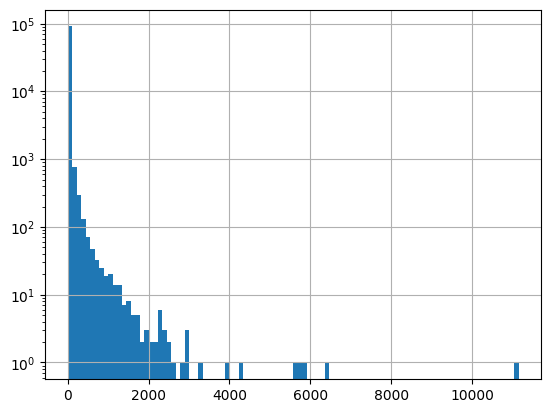

In [13]:
user_cnt['count'].hist(bins=100, log=True)

In [14]:
len(user_cnt.loc[user_cnt['count'] == 1])

51270

In [15]:
51270/92106    # 한번만 책을 구입 고객이 55%

0.5566412611556251

In [19]:
len(user_cnt.loc[user_cnt['count'] <= 20])

85732

In [20]:
85732/92106

0.930797125051571

In [23]:
len(user_cnt.loc[user_cnt['count'] <= 70])

89853

In [24]:
89853/92106

0.9755390528304345

In [42]:
92106 - 89853

2253

In [25]:
# book 대상으로 확인
book_cnt = combined.groupby('Book-Title').agg({'count': 'sum'}).sort_values(by='count').reset_index()
book_cnt

,Book-Title,count
0,Ã?Â?ber den Wassern schweben.,1
1,Pokemon: The Official Collector's Sticker Book,1
2,Nonbook Materials: The Organization of Integr...,1
3,Microsoft Application Architecture For Micros...,1
4,Tales of Terror and Suspense,1
...,...,...
241066,The Nanny Diaries: A Novel,828
241067,A Painted House,838
241068,The Da Vinci Code,898
241069,The Lovely Bones: A Novel,1295


In [26]:
len(book_cnt.loc[book_cnt['count'] == 1])

127513

In [27]:
len(book_cnt.loc[book_cnt['count'] <= 5])

209390

In [28]:
127513/241071    # 한권만 팔린 책이 52%

0.5289437551592684

<Axes: >

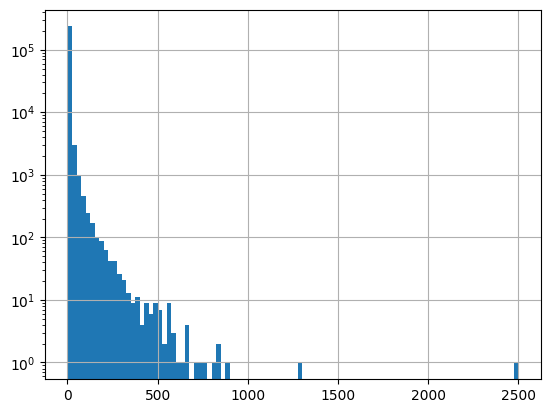

In [29]:
book_cnt['count'].hist(bins=100, log=True)

# Pareto Distribution : 부의 분포 - 불 공평한 분포(대부분의 소유가  부에 의해서 결정 됨)

In [34]:
len(book_cnt.loc[book_cnt['count'] <= 20])

233868

In [35]:
233868 / 241071 

0.9701208357703747

In [36]:
241071 - 233868

7203

In [44]:
pop_books = book_cnt.loc[book_cnt['count'] > 50 ]['Book-Title']
pop_books 

238690              The Face of Fear
238691               The Silver Wolf
238692          The Art of Deception
238693              Private Scandals
238694                          Iced
                     ...            
241066    The Nanny Diaries: A Novel
241067               A Painted House
241068             The Da Vinci Code
241069     The Lovely Bones: A Novel
241070                   Wild Animus
Name: Book-Title, Length: 2381, dtype: object

In [51]:
heavy_users = user_cnt.loc[user_cnt['count'] > 30 ]['User-ID']
heavy_users

87471    128915
87472    205708
87473     46297
87474    241992
87475    160451
          ...  
92101     35859
92102     98391
92103    153662
92104    198711
92105     11676
Name: User-ID, Length: 4635, dtype: int64

In [52]:
u_filter = combined.loc[combined['User-ID'].isin(heavy_users)]
filtered = u_filter.loc[u_filter['Book-Title'].isin(pop_books)]
filtered

,User-ID,Book-Rating,Book-Title,count
134,276847,0,Along Came a Spider (Alex Cross Novels),1
298,276925,10,Politically Correct Bedtime Stories: Modern Ta...,1
303,276925,0,Matilda,1
310,276925,0,The Lovely Bones: A Novel,1
311,276925,0,The Restaurant at the End of the Universe (Hit...,1
...,...,...,...,...
1031080,276688,0,Strip Tease,1
1031082,276688,0,Dr. Death: A Novel,1
1031084,276688,0,Midnight in the Garden of Good and Evil,1
1031089,276688,0,Angela's Ashes: A Memoir,1


In [53]:
len(set(filtered['User-ID']))

4533

In [54]:
len(set(filtered['Book-Title']))

2381

In [55]:
pvt = filtered.pivot_table(index='User-ID', 
                     columns='Book-Title', 
                     values='Book-Rating').fillna(0)
pvt

Book-Title,10 Lb. Penalty,16 Lighthouse Road,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2061: Odyssey Three,24 Hours,2nd Chance,3rd Degree,...,YOU BELONG TO ME,Year of Wonders,You Belong To Me,You Shall Know Our Velocity,Young Wives,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""",stardust
User-ID,,,,,,,,,,,,,,,,,,,,,
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278535,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0
278582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
4533 * 2381

10793073

In [57]:
book_user_corr = pvt.T.corr()

In [58]:
book_user_corr

User-ID,243,254,383,507,638,643,651,741,805,882,...,278137,278144,278188,278221,278356,278418,278535,278582,278633,278843
User-ID,,,,,,,,,,,,,,,,,,,,,
243,1.000000,-0.007126,-0.002217,-0.005440,0.091801,-0.001652,-0.003677,-0.001652,-0.006088,-0.006977,...,-0.004288,NaN,-0.005868,-0.004030,-0.004341,-0.005224,-0.005176,-0.005543,0.035178,-0.005715
254,-0.007126,1.000000,-0.002432,0.173639,-0.009949,-0.001813,-0.004035,-0.001813,-0.006681,-0.007655,...,-0.004705,NaN,-0.006438,-0.004422,0.292642,-0.005733,-0.005680,-0.006083,-0.008322,0.073353
383,-0.002217,-0.002432,1.000000,-0.001857,-0.003095,-0.000564,-0.001255,-0.000564,-0.002078,-0.002381,...,-0.001463,NaN,-0.002003,-0.001375,-0.001482,-0.001783,-0.001767,-0.001892,-0.002588,-0.001951
507,-0.005440,0.173639,-0.001857,1.000000,-0.007594,-0.001384,-0.003080,-0.001384,-0.005100,-0.005844,...,-0.003591,NaN,-0.004915,-0.003375,-0.003636,-0.004376,-0.004336,-0.004643,-0.006352,-0.004787
638,0.091801,-0.009949,-0.003095,-0.007594,1.000000,-0.002306,-0.005133,-0.002306,0.030008,0.095319,...,0.063138,NaN,-0.008192,0.063398,-0.006060,0.050407,-0.007227,-0.007739,0.077971,-0.007979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278418,-0.005224,-0.005733,-0.001783,-0.004376,0.050407,-0.001329,-0.002958,-0.001329,-0.004898,-0.005612,...,-0.003449,NaN,-0.004720,-0.003242,-0.003492,1.000000,-0.004164,-0.004459,-0.006101,-0.004598
278535,-0.005176,-0.005680,-0.001767,-0.004336,-0.007227,-0.001317,-0.002931,-0.001317,-0.004853,-0.005561,...,-0.003417,NaN,-0.004677,-0.003212,-0.003460,-0.004164,1.000000,-0.004418,-0.006045,-0.004555
278582,-0.005543,-0.006083,-0.001892,-0.004643,-0.007739,-0.001410,-0.003139,-0.001410,-0.005197,-0.005955,...,-0.003660,NaN,-0.005008,-0.003440,0.070472,-0.004459,-0.004418,1.000000,-0.006473,-0.004878


In [59]:
interested = 243
book_user_corr.sort_values(by=interested, ascending=False)[interested].head()

User-ID
243       1.000000
213141    0.290893
89207     0.251551
270629    0.227557
33474     0.225883
Name: 243, dtype: float64

In [60]:
interested = 183476
book_user_corr.sort_values(by=interested, ascending=False)[interested].head()

User-ID
183476    1.000000
187606    0.553109
216027    0.385788
258352    0.343673
203603    0.330447
Name: 183476, dtype: float64

In [61]:
combined

,User-ID,Book-Rating,Book-Title,count
0,276725,0,Flesh Tones: A Novel,1
1,276726,5,Rites of Passage,1
2,276727,0,The Notebook,1
3,276729,3,Help!: Level 1,1
4,276729,6,The Amsterdam Connection : Level 4 (Cambridge ...,1
...,...,...,...,...
1031131,276704,0,Edgar Cayce on the Akashic Records: The Book o...,1
1031132,276704,9,Get Clark Smart : The Ultimate Guide for the S...,1
1031133,276706,0,Eight Weeks to Optimum Health: A Proven Progra...,1
1031134,276709,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),1


In [62]:
user_1 = 183476
user_2 = 187606

In [63]:
u1 =set(combined.loc[combined['User-ID'] == user_1]['Book-Title'])
u2 =set(combined.loc[combined['User-ID'] == user_2]['Book-Title'])

In [64]:
diff = u2.difference(u1)
diff

{'365 Ways To Live To 100',
 'A Blessed Event : A Novel',
 'A Year in Van Nuys',
 'Animal Sense',
 'Anne of Green Gables',
 'Behind the Smile: My Journey Out of Postpartum Depression',
 'Believing it All : What My Children Taught Me About Trout Fishing, Jelly Toast and Life',
 'Blues in the Night',
 'Bon Appetit, Baby! The Breastfeeding Kit',
 'Couplehood',
 'Dirt',
 'Flowers in the Rain &amp; Other Stories',
 'Garden of Angels',
 'Gathering Blue (Readers Circle)',
 'Get the Sugar Out: 501 Simple Ways to Cut the Sugar in Any Diet',
 'I Just Got A Puppy, What Do I Do? : How to Buy, Train, Understand, and Enjoy Your Puppy',
 'Lasting Love: The Five Secrets of Growing a Vital, Conscious Relationship',
 "Lyra's Oxford",
 "Maggie's Door",
 'Motherkind: A Novel (Vintage Contemporaries)',
 'Quiver',
 'Rising to the Light : A Portrait of Bruno Bettelheim',
 'SILENT PASSAGE: MENOPAUSE : SILENT PASSAGE: MENOPAUSE',
 'SPOKEN IN WHISPERS: THE AUTOBIOGRAPHY OF A HORSE WHISPERER',
 'Safe Return Home

In [65]:
u2_all = combined.loc[combined['User-ID'] == user_2]
filtered = u2_all.loc[combined['Book-Title'].isin(diff)]
filtered

,User-ID,Book-Rating,Book-Title,count
693700,187606,0,The Seven Stories of Love: How to Recognize Yo...,1
693701,187606,0,St. John's Wort: The Herbal Way to Feeling Good,1
693702,187606,10,Dirt,1
693703,187606,0,The Healing Companion: Simple and Effective Wa...,1
693704,187606,0,The Things I Know Best: A Novel,1
693705,187606,0,"The Murad Method: Wrinkle-Proof, Repair, and R...",1
693706,187606,0,Flowers in the Rain &amp; Other Stories,1
693707,187606,8,The Sculptress (Sculptress),1
693708,187606,0,Believing it All : What My Children Taught Me ...,1
693709,187606,0,Blues in the Night,1


In [66]:
filtered.sort_values(by='Book-Rating', ascending=False).head()['Book-Title']

693702                                                 Dirt
693734    I Just Got A Puppy, What Do I Do? : How to Buy...
693707                          The Sculptress (Sculptress)
693729    Get the Sugar Out: 501 Simple Ways to Cut the ...
693742                              365 Ways To Live To 100
Name: Book-Title, dtype: object

# 상품 추천 서비스 연습

In [67]:
import pandas as pd

In [8]:
opp = pd.read_csv('./order/order_products_prior.csv')
orders = pd.read_csv('./order/orders.csv')
products = pd.read_csv('./order/products.csv')

print(opp.shape)
print(orders.shape)
print(products.shape)

(32434489, 4)
(3421083, 7)
(49688, 4)


In [9]:
opp.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [10]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [11]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [12]:
merged = pd.merge(opp, orders)
merged

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,prior,24,2,6,21.0
32434485,3421083,11352,7,0,25247,prior,24,2,6,21.0
32434486,3421083,4600,8,0,25247,prior,24,2,6,21.0
32434487,3421083,24852,9,1,25247,prior,24,2,6,21.0


In [13]:
merged['count'] = 1
merged.groupby(['product_id', 'user_id']).agg({'count': 'sum'})

count
product_id user_id       
1          138          2
           709          1
           764          2
           777          1
           825          1
...                   ...
49688      197371       1
           200215       1
           200377       1
           200873       2
           205926       1

[13307953 rows x 1 columns]

In [14]:
merged.groupby(['product_id', 'user_id']).agg({'count': 'sum'}).reset_index()

,product_id,user_id,count
0,1,138,2
1,1,709,1
2,1,764,2
3,1,777,1
4,1,825,1
...,...,...,...
13307948,49688,197371,1
13307949,49688,200215,1
13307950,49688,200377,1
13307951,49688,200873,2


In [15]:
merged['count'] = 1
group_agg = merged.groupby(['product_id', 'user_id']).agg({'count': 'sum'}).reset_index()
group_agg.head()

,product_id,user_id,count
0,1,138,2
1,1,709,1
2,1,764,2
3,1,777,1
4,1,825,1


In [80]:
pvt = group_agg.pivot_table(index='user_id',
                            columns='product_id',
                            values='count')
print(ovt.shape)

MemoryError: Unable to allocate 76.3 GiB for an array with shape (206209, 49677) and data type float64

In [81]:
len(set(group_agg['user_id']))

206209

In [82]:
len(set(group_agg['product_id']))

49677

In [83]:
206209 * 49677

10243844493

In [16]:
# Product 기준 Filterring
product_count = group_agg.groupby('product_id').agg({'count': 'sum'}).sort_values(by='count').reset_index()
product_count

,product_id,count
0,17585,1
1,45273,1
2,39759,1
3,6062,1
4,30068,1
...,...,...
49672,47209,213584
49673,21903,241921
49674,21137,264683
49675,13176,379450


<Axes: >

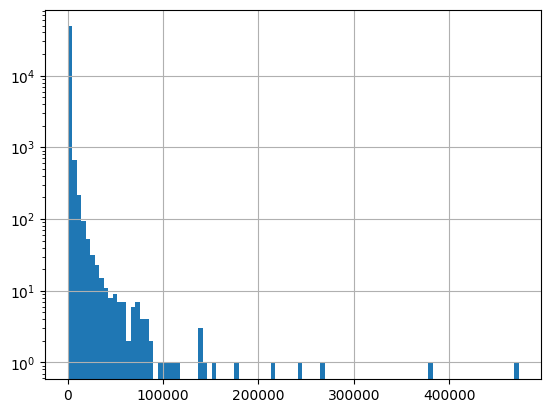

In [88]:
product_count['count'].hist(bins=100, log=True)   # log scale Histogram graph

In [17]:
len(product_count.loc[product_count['count'] < 1000])   # 고객이 자주 찾지 않는 상품

44619

In [18]:
49677 - 44619

5058

In [19]:
# User 기준 Filterring
user_count = group_agg.groupby('user_id').agg({'count': 'sum'}).sort_values(by='count').reset_index()
user_count

,user_id,count
0,92897,3
1,158161,3
2,199608,3
3,52168,3
4,166064,3
...,...,...
206204,176478,2921
206205,186704,2936
206206,164055,3061
206207,129928,3638


<Axes: >

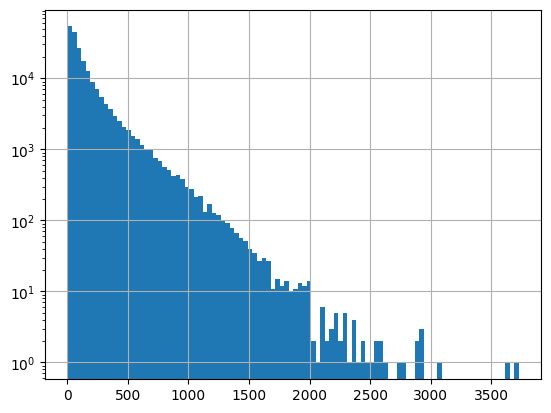

In [20]:
user_count['count'].hist(bins=100, log=True)   # log scale Histogram graph

In [24]:
pop_products = set(product_count.loc[product_count['count'] > 1200]['product_id'])
len(pop_products)

4373

In [25]:
heavy_users = set(user_count.loc[user_count['count'] > 900]['user_id'])
len(heavy_users)

3086

In [26]:
pro_filter = group_agg.loc[group_agg['product_id'].isin(pop_products)]
filtered = pro_filter.loc[pro_filter['user_id'].isin(heavy_users)]
filtered

,product_id,user_id,count
79,1,18631,1
240,1,65325,6
286,1,80379,5
298,1,84549,37
316,1,90343,1
...,...,...,...
13307640,49683,205213,11
13307646,49683,205237,6
13307715,49683,205754,4
13307754,49683,206035,1


In [27]:
pvt = filtered.pivot_table(index='user_id',
                           columns='product_id',
                           values='count').fillna(0)
pvt.shape

(3086, 4371)

In [28]:
pvt

product_id,1,10,25,34,45,49,79,93,95,116,...,49583,49585,49605,49609,49610,49615,49621,49628,49667,49683
user_id,,,,,,,,,,,,,,,,,,,,,
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
206053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# 고객과 상품 관계
product_corr = pvt.corr()
print(product_corr)

product_id,1,10,23,25,34,45,49,54,63,79,...,49585,49605,49609,49610,49615,49621,49628,49667,49680,49683
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.002418,-0.002431,-0.002232,-0.004149,-0.006284,-0.002521,-0.001051,-0.002932,-0.004059,...,-0.003787,0.030938,-0.001229,0.003881,-0.001105,-0.003496,-0.003753,-0.001707,-0.002722,-0.001829
10,-0.002418,1.000000,-0.006294,0.012049,0.041216,-0.012909,-0.003213,-0.002720,-0.006246,-0.007485,...,-0.002358,-0.006468,-0.002124,-0.003328,-0.002860,-0.004381,0.049793,-0.003256,-0.004501,-0.014040
23,-0.002431,-0.006294,1.000000,-0.002623,-0.009495,0.025267,-0.006562,-0.002735,-0.005671,-0.001741,...,-0.003578,-0.008279,-0.003200,0.051219,-0.002876,-0.008453,0.000031,-0.004443,0.002207,0.017954
25,-0.002232,0.012049,-0.002623,1.000000,0.010878,-0.008447,-0.006023,-0.002510,-0.001019,-0.007924,...,-0.006690,-0.006865,-0.002749,0.009668,-0.002639,0.013133,0.016924,-0.004078,-0.001513,-0.012677
34,-0.004149,0.041216,-0.009495,0.010878,1.000000,-0.011430,-0.002637,-0.004667,0.001758,-0.012658,...,-0.006170,-0.006975,-0.005113,0.012221,-0.001341,-0.009175,0.028969,0.005243,-0.006657,0.014320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49621,-0.003496,-0.004381,-0.008453,0.013133,-0.009175,-0.004813,0.002260,-0.003933,0.000882,0.025033,...,0.028563,0.002811,-0.004602,-0.005467,-0.004135,1.000000,-0.008663,-0.003350,-0.005197,-0.009965
49628,-0.003753,0.049793,0.000031,0.016924,0.028969,-0.011379,-0.009469,-0.001600,-0.006760,-0.008335,...,-0.010172,-0.006709,0.052432,0.000589,-0.003790,-0.008663,1.000000,-0.000187,0.029419,-0.018062
49667,-0.001707,-0.003256,-0.004443,-0.004078,0.005243,0.000663,-0.000381,-0.001920,-0.004898,-0.007417,...,-0.002625,-0.000183,-0.002246,-0.003109,-0.001277,-0.003350,-0.000187,1.000000,0.001114,-0.003640


In [118]:
product_corr.head(50)

product_id,1,10,23,25,34,45,49,54,63,79,...,49585,49605,49609,49610,49615,49621,49628,49667,49680,49683
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.002418,-0.002431,-0.002232,-0.004149,-0.006284,-0.002521,-0.001051,-0.002932,-0.004059,...,-0.003787,0.030938,-0.001229,0.003881,-0.001105,-0.003496,-0.003753,-0.001707,-0.002722,-0.001829
10,-0.002418,1.000000,-0.006294,0.012049,0.041216,-0.012909,-0.003213,-0.002720,-0.006246,-0.007485,...,-0.002358,-0.006468,-0.002124,-0.003328,-0.002860,-0.004381,0.049793,-0.003256,-0.004501,-0.014040
23,-0.002431,-0.006294,1.000000,-0.002623,-0.009495,0.025267,-0.006562,-0.002735,-0.005671,-0.001741,...,-0.003578,-0.008279,-0.003200,0.051219,-0.002876,-0.008453,0.000031,-0.004443,0.002207,0.017954
25,-0.002232,0.012049,-0.002623,1.000000,0.010878,-0.008447,-0.006023,-0.002510,-0.001019,-0.007924,...,-0.006690,-0.006865,-0.002749,0.009668,-0.002639,0.013133,0.016924,-0.004078,-0.001513,-0.012677
34,-0.004149,0.041216,-0.009495,0.010878,1.000000,-0.011430,-0.002637,-0.004667,0.001758,-0.012658,...,-0.006170,-0.006975,-0.005113,0.012221,-0.001341,-0.009175,0.028969,0.005243,-0.006657,0.014320
45,-0.006284,-0.012909,0.025267,-0.008447,-0.011430,1.000000,-0.012176,-0.007069,-0.017159,0.004706,...,-0.005760,-0.004568,-0.006374,-0.011570,0.001909,-0.004813,-0.011379,0.000663,0.000144,-0.022260
49,-0.002521,-0.003213,-0.006562,-0.006023,-0.002637,-0.012176,1.000000,-0.002835,-0.007476,0.004745,...,0.005034,-0.006864,-0.002459,0.000745,-0.002981,0.002260,-0.009469,-0.000381,-0.007348,0.017300
54,-0.001051,-0.002720,-0.002735,-0.002510,-0.004667,-0.007069,-0.002835,1.000000,-0.003298,-0.004566,...,-0.004260,-0.001207,-0.001383,0.000567,-0.001243,-0.003933,-0.001600,-0.001920,0.017450,0.001365
63,-0.002932,-0.006246,-0.005671,-0.001019,0.001758,-0.017159,-0.007476,-0.003298,1.000000,0.010782,...,0.005756,-0.009982,-0.002552,-0.006799,-0.003467,0.000882,-0.006760,-0.004898,-0.008546,-0.012492


In [119]:
interested = 258
product_corr.sort_values(by=interested, ascending=False)[interested].head()

product_id
258      1.000000
48290    0.223781
36675    0.197635
2481     0.164842
42796    0.163050
Name: 258, dtype: float64

In [120]:
user_1 = 258
user_2 = 48290

In [121]:
u1 =set(merged.loc[merged['user_id'] == user_1]['product_id'])
u2 =set(merged.loc[merged['user_id'] == user_2]['product_id'])

In [122]:
diff = u2.difference(u1)
diff

{95,
 248,
 890,
 1999,
 2053,
 2063,
 2314,
 3494,
 4086,
 4513,
 5373,
 5450,
 5479,
 5878,
 6455,
 8174,
 8518,
 9080,
 9387,
 9786,
 9906,
 10243,
 10644,
 12419,
 12845,
 13984,
 17794,
 19508,
 21616,
 21903,
 22935,
 23165,
 24184,
 24431,
 24964,
 25659,
 26209,
 26723,
 28204,
 28289,
 28849,
 29265,
 30489,
 32177,
 34126,
 34356,
 34525,
 36011,
 36550,
 37646,
 37807,
 39475,
 39812,
 40251,
 40604,
 40646,
 41220,
 41540,
 41690,
 42129,
 43789,
 44683,
 46667,
 46969,
 47209,
 48679,
 48745,
 48775}

In [124]:
u2_all = merged.loc[merged['user_id'] == user_2]
filtered = u2_all.loc[merged['product_id'].isin(diff)]
filtered

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,count
3258982,344167,5479,1,1,48290,prior,8,0,11,14.0,1
3258984,344167,5373,3,0,48290,prior,8,0,11,14.0,1
3258986,344167,4086,5,0,48290,prior,8,0,11,14.0,1
3258987,344167,28204,6,1,48290,prior,8,0,11,14.0,1
3258988,344167,43789,7,0,48290,prior,8,0,11,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...
29184089,3077883,2314,1,0,48290,prior,1,0,15,NaN,1
29184090,3077883,36011,2,0,48290,prior,1,0,15,NaN,1
29184091,3077883,39475,3,0,48290,prior,1,0,15,NaN,1
29184092,3077883,6455,4,0,48290,prior,1,0,15,NaN,1


In [126]:
prod_filterd = filtered.sort_values(by='user_id', ascending=False).head()['product_id']

In [139]:
prod_filterd_df = pd.DataFrame(prod_filterd).reset_index()
prod_filterd_df

,index,product_id
0,3258982,5479
1,3258984,5373
2,3258986,4086
3,3258987,28204
4,3258988,43789


In [140]:
print(prod_filterd_df['product_id'])

0     5479
1     5373
2     4086
3    28204
4    43789
Name: product_id, dtype: int64


In [142]:
products.loc[prod_filterd_df['product_id']]

,product_id,product_name,aisle_id,department_id
5479,5480,Major Grey's Mango Chutney,88,13
5373,5374,Ultra Soft & Strong Double Roll Toilet Paper,54,17
4086,4087,Boneless & Skinless Chicken Thighs,49,12
28204,28205,Golden Toasted Bread Crumbs,5,13
43789,43790,Spice Hunter Organic Ranch Dip,89,13


In [29]:
user_corr = pvt.T.corr()
print(user_corr)

user_id    140       210       290       323       444       462       719     \
user_id                                                                         
140      1.000000  0.041142 -0.004315  0.134927  0.119164  0.122105  0.172504   
210      0.041142  1.000000  0.002615  0.076512  0.132433  0.058095  0.053042   
290     -0.004315  0.002615  1.000000 -0.006326 -0.005390 -0.002213  0.000185   
323      0.134927  0.076512 -0.006326  1.000000  0.107636  0.193761  0.049826   
444      0.119164  0.132433 -0.005390  0.107636  1.000000  0.143967  0.094203   
...           ...       ...       ...       ...       ...       ...       ...   
205831   0.101441  0.064666 -0.008044  0.123928  0.101426  0.162982  0.068225   
206035   0.109650  0.206483  0.003261  0.157753  0.123602  0.112884  0.147804   
206053   0.135724  0.093872 -0.002703  0.108948  0.133327  0.106365  0.157218   
206079   0.057179  0.186930 -0.009568  0.171231  0.096693  0.082746  0.170603   
206086   0.109146  0.075122 

In [30]:
interested = 140
user_corr.sort_values(by=interested, ascending=False)[interested].head()

user_id
140       1.000000
165669    0.289189
119835    0.269282
12849     0.264082
76272     0.263614
Name: 140, dtype: float64

In [31]:
user_1 = 140
user_2 = 165669

In [32]:
u1 =set(merged.loc[merged['user_id'] == user_1]['product_id'])
u2 =set(merged.loc[merged['user_id'] == user_2]['product_id'])

In [33]:
diff = u2.difference(u1)
diff

{63,
 148,
 162,
 204,
 226,
 283,
 651,
 1402,
 1463,
 1695,
 1819,
 2108,
 2344,
 2450,
 2581,
 2596,
 2611,
 2966,
 2979,
 3376,
 3896,
 4597,
 4914,
 4957,
 5134,
 5405,
 5539,
 5621,
 6046,
 6348,
 6375,
 6656,
 7014,
 7952,
 8021,
 9339,
 9422,
 9547,
 9864,
 10132,
 10831,
 11182,
 11288,
 11481,
 12144,
 12206,
 12816,
 13080,
 13198,
 14872,
 15261,
 15335,
 15683,
 16349,
 16987,
 17355,
 17949,
 18383,
 18441,
 18891,
 19019,
 19385,
 19678,
 19706,
 19816,
 20327,
 20632,
 20794,
 20995,
 21227,
 21543,
 21681,
 21847,
 21955,
 22035,
 23099,
 23554,
 24184,
 25340,
 25666,
 25837,
 25890,
 26128,
 26133,
 26453,
 27012,
 27683,
 27783,
 28199,
 28471,
 28476,
 28568,
 28946,
 29079,
 29447,
 29926,
 30011,
 30233,
 30561,
 30776,
 30825,
 30850,
 31221,
 31350,
 32170,
 32426,
 32442,
 33120,
 33472,
 34401,
 35167,
 35750,
 35887,
 35973,
 36082,
 36735,
 37076,
 37147,
 37158,
 37220,
 37687,
 38164,
 38192,
 38293,
 38457,
 38730,
 38777,
 39216,
 39267,
 39374,
 39475,

In [34]:
u2_all = merged.loc[merged['user_id'] == user_2]
filtered = u2_all.loc[merged['product_id'].isin(diff)]
filtered

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,count
877672,92878,29447,2,1,165669,prior,71,0,15,7.0,1
877674,92878,33120,4,1,165669,prior,71,0,15,7.0,1
877676,92878,37158,6,1,165669,prior,71,0,15,7.0,1
877677,92878,2966,7,1,165669,prior,71,0,15,7.0,1
877678,92878,30776,8,1,165669,prior,71,0,15,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...
32227030,3399199,49111,16,0,165669,prior,3,2,8,4.0,1
32227031,3399199,6656,17,1,165669,prior,3,2,8,4.0,1
32227032,3399199,39216,18,0,165669,prior,3,2,8,4.0,1
32227033,3399199,10831,19,1,165669,prior,3,2,8,4.0,1


In [36]:
prod_filterd = filtered.sort_values(by='user_id', ascending=False).head()['product_id']
prod_filterd

32227034    25890
877672      29447
877674      33120
877676      37158
877677       2966
Name: product_id, dtype: int64

In [37]:
prod_filterd_df = pd.DataFrame(prod_filterd).reset_index()
prod_filterd_df

,index,product_id
0,32227034,25890
1,877672,29447
2,877674,33120
3,877676,37158
4,877677,2966


In [38]:
products.loc[prod_filterd_df['product_id']]

,product_id,product_name,aisle_id,department_id
25890,25891,All Purpose Salt Free Blend Seasoning,104,13
29447,29448,No Salt Added Solid Light Tuna In Water,95,15
33120,33121,"Oikos Yogurt Drink, Strawberry",120,16
37158,37159,Wasabi Sauce,66,6
2966,2967,Voluminous Original Mascara - Waterproof Black...,132,11


### 연결 강도의 다른 관점
- 비율로 계산 할 수 있음
- 예) 140번 고객이 45번 제품을 100건 구매 -> 10번 방문 -> 1번 방문 10건 구매
-     210번 고객은 45번 제품을 20건 구매 -> 10번 방문 -> 1번 방문 2 건 구매

In [39]:
pd.DataFrame(orders['user_id'].value_counts())

,count
user_id,
75124,100
173431,100
127158,100
96192,100
173073,100
...,...
101710,4
33,4
24824,4


In [40]:
user_counts = pd.DataFrame(orders['user_id'].value_counts()).reset_index()
user_counts

,user_id,count
0,75124,100
1,173431,100
2,127158,100
3,96192,100
4,173073,100
...,...,...
206204,101710,4
206205,33,4
206206,24824,4
206207,206186,4


In [41]:
user_counts.columns = ['user_id', 'user_freq']
user_counts

,user_id,user_freq
0,75124,100
1,173431,100
2,127158,100
3,96192,100
4,173073,100
...,...,...
206204,101710,4
206205,33,4
206206,24824,4
206207,206186,4


In [42]:
group_user = pd.merge(group_agg, user_counts)
group_user['ratio'] = group_user['count'] / group_user['user_freq']
group_user.head()

,product_id,user_id,count,user_freq,ratio
0,1,138,2,33,0.060606
1,1,709,1,6,0.166667
2,1,764,2,4,0.500000
3,1,777,1,27,0.037037
4,1,825,1,10,0.100000


In [43]:
group_user.sort_values(by='user_freq')[::-1]

,product_id,user_id,count,user_freq,ratio
4072771,16521,185524,1,100,0.01
30,1,8703,1,100,0.01
11303100,42768,32617,3,100,0.03
4072797,16521,186704,1,100,0.01
11303001,42768,31118,1,100,0.01
...,...,...,...,...,...
4072793,16521,186590,1,4,0.25
4072795,16521,186600,1,4,0.25
4072706,16521,182600,1,4,0.25
13307883,49688,35284,1,4,0.25


In [44]:
group_user.loc[group_user['user_freq'] == 100].sort_values(by='ratio')[::-1]

,product_id,user_id,count,user_freq,ratio
3607540,14366,41356,99,100,0.99
1625475,6583,41356,99,100,0.99
10140076,38652,41356,99,100,0.99
6550359,25133,141736,99,100,0.99
901207,4210,17997,99,100,0.99
...,...,...,...,...,...
13307213,49683,202272,1,100,0.01
13307195,49683,202153,1,100,0.01
13306802,49683,199280,1,100,0.01
13306699,49683,198565,1,100,0.01


In [ ]:
products.loc[products['product_id'] == 6583]

In [ ]:
products.loc[products['product_id'] == 14366]

In [ ]:
products.loc[products['product_id'] == 38652]

In [ ]:
group_user['ones'] = 1 
group_user.groupby('product_id').agg({'ones':'sum'}).hist(bins=100, log=True) # 잘팔리는 제품은 극소수임

In [ ]:
group_user['ones'] = 1 
group_user.groupby('product_id').agg({'ones':'sum'}).sort_values(by='ones')[::-1].head() 

In [ ]:
products.loc[products['product_id'] == 24852]

In [ ]:
products.loc[products['product_id'] == 13176]

In [ ]:
### 더 고민 해보아야 할 내용 - 데이터에 대한 생각의 차이는 도출
- order에서 요일 / 시간 정보 -> 시간: 오전, 오후 , 요일 : 평일, 주말 
- 고객의 차이 -> 신규 고객, 기존 고객 - order : order_number = 1 신규, 아니면 기존고객
- 기준 정해서 줄세우기 가능 : 또 다른 추천 시스템 구축 

In [ ]:
set(orders['order_hour_of_day'])

In [ ]:
mapper = {0 : 0,
 1 : 0,
 2 : 0,
 3 : 0,
 4 : 0,
 5 : 0,
 6 : 0,
 7 : 0,
 8 : 0,
 9 : 0,
 10 : 0,
 11 : 0,
 12 : 0,
 13 : 1,
 14 : 1,
 15 : 1,
 16 : 1,
 17 : 1,
 18 : 1,
 19 : 1,
 20 : 1,
 21 : 1,
 22 : 1,
 23 : 1}

In [ ]:
orders['hour_type'] = orders['order_hour_of_day'].map(mapper)

In [ ]:
orders.columns

In [ ]:
set(orders['order_dow'])

In [ ]:
mapper = {0 : 0,
          1 : 0,
          2 : 0,
          3 : 0,
          4 : 0,
          5 : 1,
          6 : 1}

In [ ]:
orders['dow_type'] = orders['order_dow'].map(mapper)

In [ ]:
orders.columns

In [ ]:
orders

In [ ]:
orders['user_type'] = orders['order_number'].apply(lambda x: 0 if x == 1 else 1)   # 신규 고객: 0, 기존 고객: 1

In [ ]:
set(orders['user_type'])

In [ ]:
orders